# Supervised Machine Learning - Regression

1. Importing libraries and datasets
2. Creating data subset for regression
3. Data Cleaning
4. Preparing the data for regression analysis
5. Regression Analysis

### 1. Importing libraries and datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path_name = r'/Users/geetika/Documents/Python/Global Data on Sustainable Energy'

In [4]:
df = pd.read_pickle(os.path.join(path_name, '02_Data', 'Prepared Data', 'GDSE_prepared_13thSept.pkl'))

In [5]:
pd.options.display.max_columns = None

In [6]:
df.head()

,Country,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude,gdp_based_zoning
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953,Not enough data
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953,Not enough data
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953,Low GDP zone
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953,Low GDP zone
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953,Low GDP zone


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 22 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Country                                                           3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [8]:
df.isnull().sum()

Country                                                                0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                  

### 2. Creating a data subset for Regression Analysis

In [9]:
df.columns

Index(['Country', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude', 'gdp_based_zoning'],
      dtype='object')

In [10]:
columns = ['Year', 
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country', 'gdp_growth',
       'gdp_per_capita','Land Area(Km2)']
df_subset = df[columns]

In [11]:
df_subset.shape

(3649, 11)

In [12]:
df_subset.head()

,Year,Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Land Area(Km2)
0,2000,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,652230.0
1,2001,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,652230.0
2,2002,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,179.426579,652230.0
3,2003,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,652230.0
4,2004,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,652230.0


### 3. Data Cleaning

Finding missing data

In [13]:
df_subset.isnull().sum()

Year                                                             0
Electricity from fossil fuels (TWh)                             21
Electricity from nuclear (TWh)                                 126
Electricity from renewables (TWh)                               21
Low-carbon electricity (% electricity)                          42
Primary energy consumption per capita (kWh/person)               0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)    207
Value_co2_emissions_kt_by_country                              428
gdp_growth                                                     317
gdp_per_capita                                                 282
Land Area(Km2)                                                   1
dtype: int64

In [14]:
df_subset.dropna(inplace = True)

/var/folders/7w/cp4_h97s3bd3qx9ww9ss1g_r0000gn/T/ipykernel_20148/3215058805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset.dropna(inplace = True)


In [15]:
df_subset.isnull().sum()

Year                                                           0
Electricity from fossil fuels (TWh)                            0
Electricity from nuclear (TWh)                                 0
Electricity from renewables (TWh)                              0
Low-carbon electricity (% electricity)                         0
Primary energy consumption per capita (kWh/person)             0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)    0
Value_co2_emissions_kt_by_country                              0
gdp_growth                                                     0
gdp_per_capita                                                 0
Land Area(Km2)                                                 0
dtype: int64

In [16]:
df_subset.head()

,Year,Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Land Area(Km2)
3,2003,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,652230.0
4,2004,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,652230.0
5,2005,0.34,0.0,0.59,63.440857,252.06912,1.41,1549.999952,11.229715,242.031313,652230.0
6,2006,0.20,0.0,0.64,76.190475,304.42090,1.50,1759.999990,5.357403,263.733602,652230.0
7,2007,0.20,0.0,0.75,78.947370,354.27990,1.53,1769.999981,13.826320,359.693158,652230.0


In [17]:
df_subset.shape

(2983, 11)

Looking for duplicates

In [18]:
df_dups = df_subset[df_subset.duplicated()]

In [19]:
df_dups

,Year,Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Land Area(Km2)


Check for Extreme values

<AxesSubplot:xlabel='Value_co2_emissions_kt_by_country', ylabel='Count'>

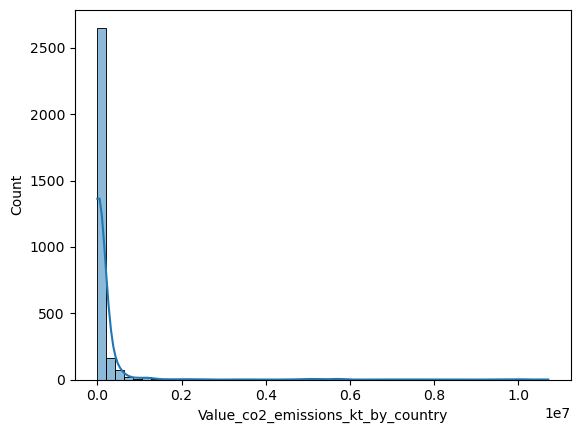

In [20]:
sns.histplot(df_subset['Value_co2_emissions_kt_by_country'], bins = 50, kde = True)

In [21]:
df_subset['Value_co2_emissions_kt_by_country'].describe()

count    2.983000e+03
mean     1.631495e+05
std      8.026021e+05
min      3.000000e+01
25%      2.210000e+03
50%      1.047000e+04
75%      5.611000e+04
max      1.070722e+07
Name: Value_co2_emissions_kt_by_country, dtype: float64

### 4. Preparing the data for regression analysis

#### Hypothesis: The higher the electricity generated from fossil fuels, the higher the carbon dioxide emissions.

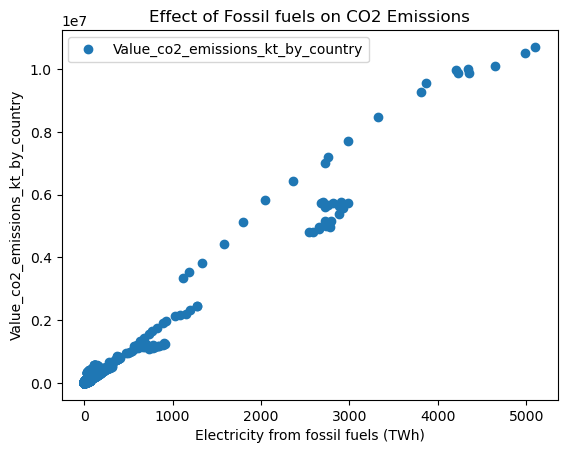

In [22]:
# Effect of Fossil fuels on CO2 Emissions - Scatterplot

df_subset.plot(x = 'Electricity from fossil fuels (TWh)', y='Value_co2_emissions_kt_by_country',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Effect of Fossil fuels on CO2 Emissions')  
plt.xlabel('Electricity from fossil fuels (TWh)')  
plt.ylabel('Value_co2_emissions_kt_by_country')  
plt.show()

In [23]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_subset['Electricity from fossil fuels (TWh)'].values.reshape(-1,1)
y = df_subset['Value_co2_emissions_kt_by_country'].values.reshape(-1,1)

In [24]:
X

array([[0.31],
       [0.33],
       [0.34],
       ...,
       [3.05],
       [3.73],
       [3.66]])

In [25]:
y

array([[ 1220.000029],
       [ 1029.999971],
       [ 1549.999952],
       ...,
       [10340.00015 ],
       [12380.00011 ],
       [11760.00023 ]])

In [26]:
# Splitting data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [27]:
X_train

array([[0.  ],
       [0.58],
       [2.14],
       ...,
       [0.95],
       [6.02],
       [7.37]])

In [28]:
# To validate the null values in X

#X_train.isnan().sum()

np.isnan(X_train).sum()

0

In [29]:
np.isnan(y_train).sum()

0

### 5. Regression Analysis

In [30]:
# Creating a regression object.

regression = LinearRegression()

In [31]:
# Fitting the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [32]:
# Predicting the values of y using X.

y_predicted = regression.predict(X_test)

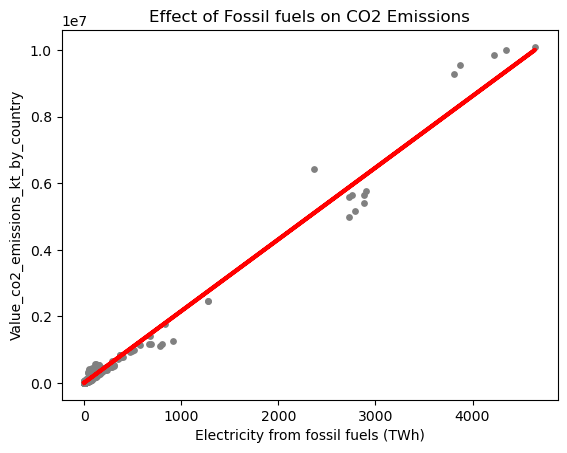

In [33]:
# Plot of the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Effect of Fossil fuels on CO2 Emissions')
plot_test.xlabel('Electricity from fossil fuels (TWh)')
plot_test.ylabel('Value_co2_emissions_kt_by_country')
plot_test.show()

In [34]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [35]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2154.45524581]]
Mean squared error:  13082695349.867184
R2 score:  0.9842537553575819


In [36]:
y_predicted

array([[3.75404200e+03],
       [3.86176476e+03],
       [4.07721028e+03],
       [3.73249744e+03],
       [4.28655706e+05],
       [3.37802328e+05],
       [7.08222338e+04],
       [1.35783579e+04],
       [2.27132482e+04],
       [3.40456828e+04],
       [6.72561584e+05],
       [1.15316254e+04],
       [2.29933273e+04],
       [1.37459535e+05],
       [5.05397401e+05],
       [8.19926323e+05],
       [6.61946747e+03],
       [2.68321146e+05],
       [8.77392272e+03],
       [3.13241538e+05],
       [1.59267141e+04],
       [4.44346768e+03],
       [2.56648518e+04],
       [3.52090886e+04],
       [3.60323013e+03],
       [2.56863964e+04],
       [4.68045775e+03],
       [4.89590328e+03],
       [1.38584371e+04],
       [3.73249744e+03],
       [8.38566880e+04],
       [1.08637443e+04],
       [1.72447888e+05],
       [5.56378440e+03],
       [1.18547937e+04],
       [1.45387930e+05],
       [3.52366445e+05],
       [1.45478628e+04],
       [8.94151826e+04],
       [2.98875841e+04],


In [37]:
# Dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,4030.000210,3754.041996
1,620.000005,3861.764759
2,2410.000086,4077.210283
3,3789.999962,3732.497444
4,353369.995100,428655.705575
5,524349.975600,337802.327859
6,118340.000000,70822.233799
7,7190.000057,13578.357917
8,56110.000610,22713.248160
9,37470.001220,34045.682753


Compare how the regression fits the training set

In [38]:
# Predict.

y_predicted_train = regression.predict(X_train)

In [39]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [40]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2154.45524581]]
Mean squared error:  12974314479.664528
R2 score:  0.9769751966254928


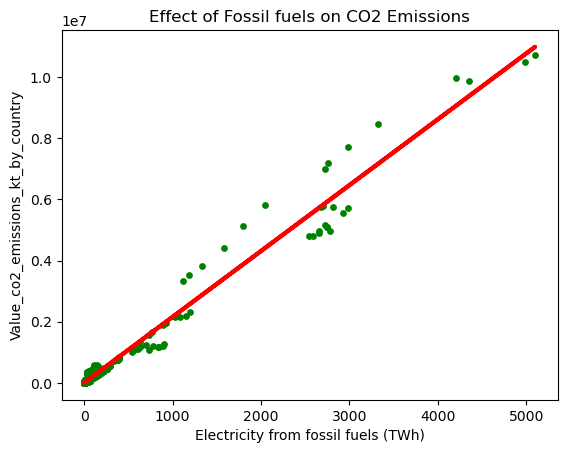

In [41]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Effect of Fossil fuels on CO2 Emissions')
plot_test.xlabel('Electricity from fossil fuels (TWh)')
plot_test.ylabel('Value_co2_emissions_kt_by_country')
plot_test.show()